In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df  = pd.read_csv('femalebirths.csv')                         #,parse_dates=["datetime"])

In [11]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [12]:
df.shape

(365, 2)

In [13]:
df.isna().sum()

Date      0
Births    0
dtype: int64

In [14]:
df.info

<bound method DataFrame.info of            Date  Births
0    1959-01-01      35
1    1959-01-02      32
2    1959-01-03      30
3    1959-01-04      31
4    1959-01-05      44
..          ...     ...
360  1959-12-27      37
361  1959-12-28      52
362  1959-12-29      48
363  1959-12-30      55
364  1959-12-31      50

[365 rows x 2 columns]>

In [16]:
df['SMA_3'] = df["Births"].rolling(window=3).mean()

In [17]:
df.iloc[:,:3]

,Date,Births,SMA_3
0,1959-01-01,35,NaN
1,1959-01-02,32,NaN
2,1959-01-03,30,32.333333
3,1959-01-04,31,31.000000
4,1959-01-05,44,35.000000
...,...,...,...
360,1959-12-27,37,38.333333
361,1959-12-28,52,41.000000
362,1959-12-29,48,45.666667
363,1959-12-30,55,51.666667


In [18]:
df['SMA_4'] = df["Births"].rolling(window=4).mean()

In [19]:
df.head()

,Date,Births,SMA_3,SMA_4
0,1959-01-01,35,NaN,NaN
1,1959-01-02,32,NaN,NaN
2,1959-01-03,30,32.333333,NaN
3,1959-01-04,31,31.000000,32.00
4,1959-01-05,44,35.000000,34.25


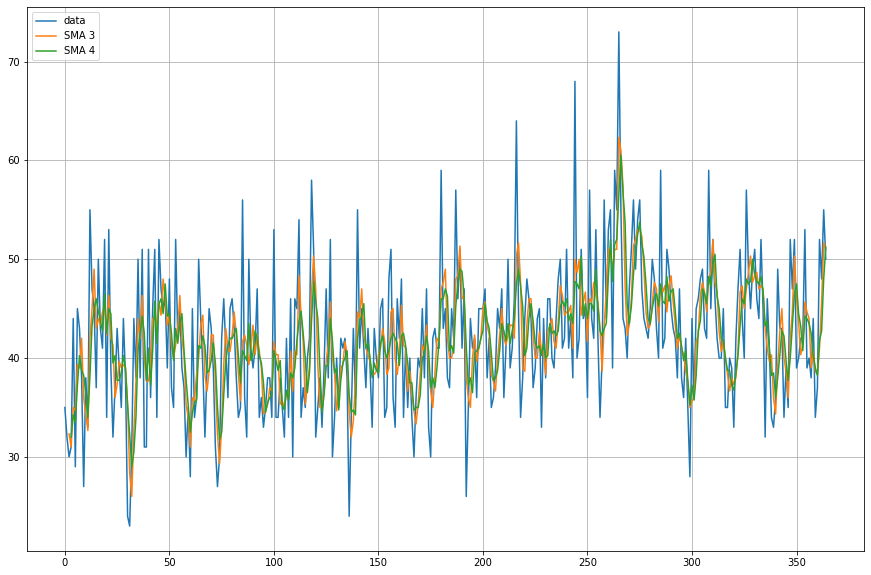

In [20]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['Births'],label='data')
plt.plot(df['SMA_3'],label='SMA 3')
plt.plot(df['SMA_4'],label='SMA 4')
plt.legend(loc=2)

In [21]:
df['CMA_4'] = df["Births"].expanding(min_periods=4).mean()

In [23]:
df.head()

,Date,Births,SMA_3,SMA_4,CMA_4
0,1959-01-01,35,NaN,NaN,NaN
1,1959-01-02,32,NaN,NaN,NaN
2,1959-01-03,30,32.333333,NaN,NaN
3,1959-01-04,31,31.000000,32.00,32.0
4,1959-01-05,44,35.000000,34.25,34.4


In [24]:
df.iloc[:,[0,1,-2]]

,Date,Births,SMA_4
0,1959-01-01,35,NaN
1,1959-01-02,32,NaN
2,1959-01-03,30,NaN
3,1959-01-04,31,32.00
4,1959-01-05,44,34.25
...,...,...,...
360,1959-12-27,37,38.25
361,1959-12-28,52,41.75
362,1959-12-29,48,42.75
363,1959-12-30,55,48.00


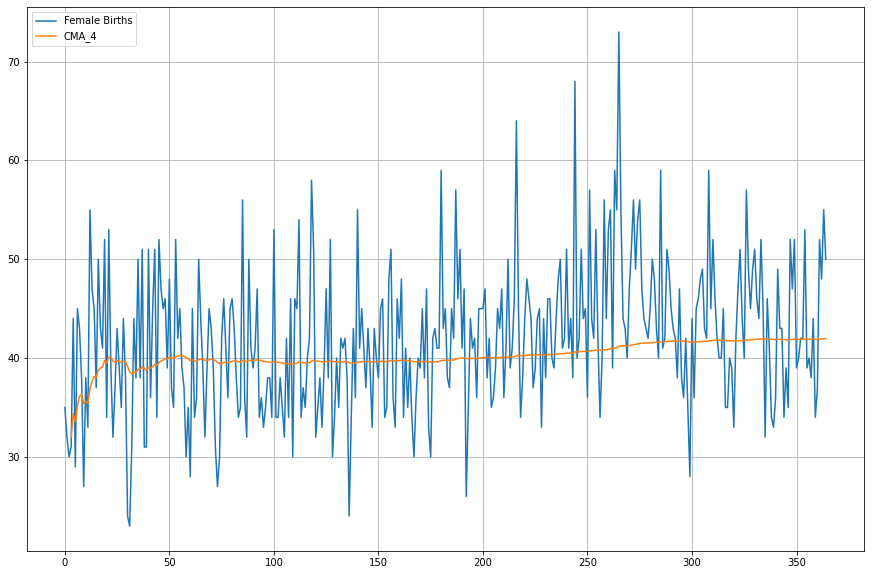

In [26]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['Births'],label='Female Births')
plt.plot(df['CMA_4'],label='CMA_4')
plt.legend(loc=2)

### Exponential Moving Average

In [30]:
df['EMA'] = df["Births"].ewm(span=40,adjust=False).mean()

In [31]:
df.head()

,Date,Births,SMA_3,SMA_4,CMA_4,EMA
0,1959-01-01,35,NaN,NaN,NaN,35.000000
1,1959-01-02,32,NaN,NaN,NaN,34.985037
2,1959-01-03,30,32.333333,NaN,NaN,34.960174
3,1959-01-04,31,31.000000,32.00,32.0,34.940423
4,1959-01-05,44,35.000000,34.25,34.4,34.985608


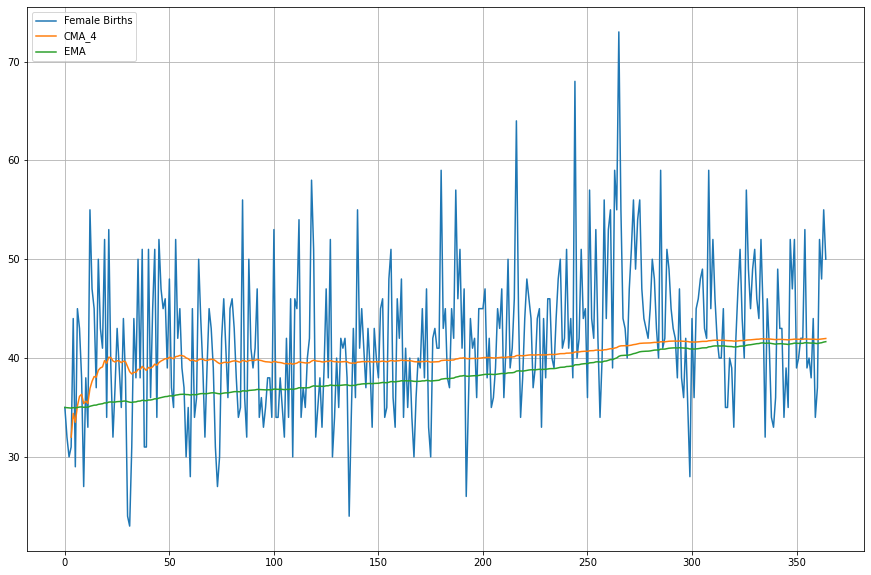

In [32]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['Births'],label='Female Births')
plt.plot(df['CMA_4'],label='CMA_4')
plt.plot(df['EMA'],label='EMA')
plt.legend(loc=2)